# MLP

## EDA
* There're no missing values from this dataset
* All columns except target column (quality) are float numbers, target values are integers

Overrall, the dataset is very clean, we don't really need to do anything with it to get a good result

In [1]:
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np


df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

## Correlation

In [5]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


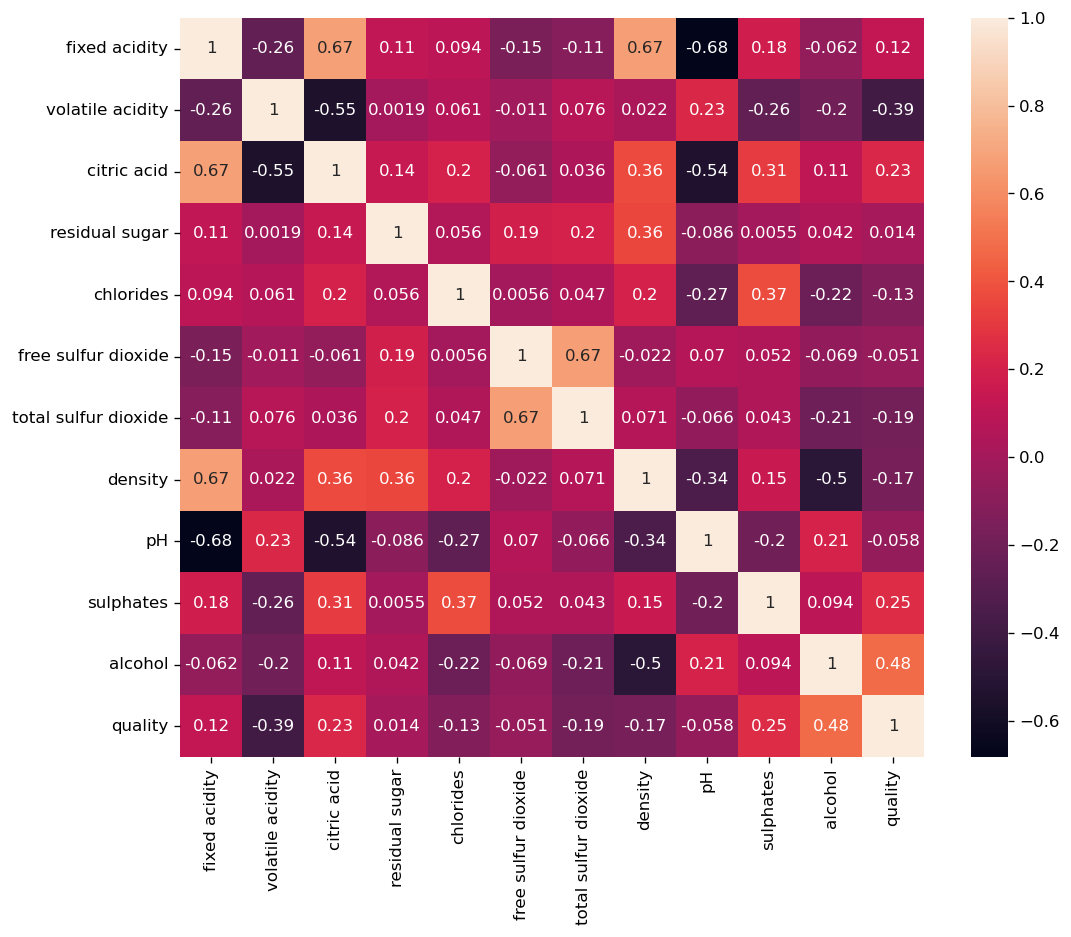

In [6]:
plt.figure(figsize=(10, 8), dpi=120)
sns.heatmap(df.corr(), annot=True)
plt.show()

# Creating a basic MLP

## Split data into train/valid/test sets

In [7]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [8]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [9]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

train_x, ee_x, train_y, ee_y = train_test_split(X, Y, test_size=0.3, random_state=42)
valid_x, test_x, valid_y, test_y = train_test_split(ee_x, ee_y, test_size=0.5, random_state=42)

In [11]:
print(train_x.shape)
print(valid_x.shape)
print(test_x.shape)

(1119, 11)
(240, 11)
(240, 11)


In [12]:
import torch

train_x = torch.tensor(train_x.to_numpy(), dtype=torch.float)
test_x = torch.tensor(test_x.to_numpy(), dtype=torch.float)
valid_x = torch.tensor(valid_x.to_numpy(), dtype=torch.float)

In [13]:
valid_x.shape

torch.Size([240, 11])

In [14]:
train_y = torch.tensor(train_y.to_numpy(), dtype=torch.float)
test_y = torch.tensor(test_y.to_numpy(), dtype=torch.float)
valid_y = torch.tensor(valid_y.to_numpy(), dtype=torch.float)

print(train_y.shape)
print(test_y.shape)
print(valid_y.shape)

torch.Size([1119])
torch.Size([240])
torch.Size([240])


## Adjusting tensor shape

In [15]:
new_shape = (-1, 1)
new_shape

(-1, 1)

In [16]:
train_y = train_y.view(new_shape)
test_y = test_y.view(new_shape)
valid_y = valid_y.view(new_shape)

print(train_y.shape)
print(test_y.shape)
print(valid_y.shape)

torch.Size([1119, 1])
torch.Size([240, 1])
torch.Size([240, 1])


In [17]:
class WineDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x)

In [18]:
wine_train = WineDataset(train_x, train_y)
train_loader = DataLoader(dataset=wine_train, batch_size=8, shuffle=True)

wine_test = WineDataset(test_x, test_y)
test_loader = DataLoader(dataset=wine_test, batch_size=8)

In [19]:
class BasicMLP(torch.nn.Module):
    def __init__(self, n_inputs, n_hidden, n_outputs):
        super(BasicMLP, self).__init__()
        self.inputs = n_inputs
        self.hidden = n_hidden
        self.outputs = n_outputs
        
        self.linear1 = torch.nn.Linear(self.inputs, self.hidden)
        self.linear2 = torch.nn.Linear(self.hidden, self.outputs)

        self.relu = torch.nn.ReLU()

    def forward(self, X):
        out = self.linear1(X)
        out = self.relu(out)
        out = self.linear2(out)
        return out

In [20]:
def get_basic_model(): 
    return BasicMLP(n_inputs=train_x.shape[1], n_hidden=5, n_outputs=1)

model = get_basic_model()
model

BasicMLP(
  (linear1): Linear(in_features=11, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)

In [21]:
model

BasicMLP(
  (linear1): Linear(in_features=11, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)

In [22]:
criterion = torch.nn.MSELoss()

In [23]:
def get_sgd_optimizer(model, lr, momentum):
    return torch.optim.SGD(params=model.parameters(), lr=lr, momentum=momentum)

optimizer = get_sgd_optimizer(model, 0.0001, 0.8)

In [24]:
# Training loop
epochs = 100

def training_func(model, optimizer, epochs, train_loss, valid_loss):
    for epoch in range(epochs):
        model.train()
        batch_loss = []
        
        losses = []
        last_lowest = 0
        
        for features, targets in train_loader:
            outputs = model.forward(features)
            loss = criterion(outputs, targets)

            if (epoch + 1 % 3 == 0) and loss >= last_lowest:
                epochs = epoch
                break
            else:
                losses.append(loss)
                last_lowest = min(losses)
            
            batch_loss.append(loss.item())
            optimizer.zero_grad() 
            loss.backward()
            optimizer.step()
            
        model.eval()
        train_loss.append(sum(batch_loss) / len(batch_loss))
        with torch.no_grad():
            predictions = model.forward(valid_x)
            loss = criterion(predictions, valid_y)
            valid_loss.append(loss.item())
        # print(f'Training loss {train_loss[-1]}, validation loss {valid_loss[-1]}')

train_loss = []
valid_loss = []

training_func(model, optimizer, epochs, train_loss, valid_loss)

def get_mse(test_x, test_y):
    hyp_test = model.forward(test_x)
    test_loss = criterion(hyp_test, test_y)
    return test_loss

test_loss = get_mse(test_x, test_y)
print(f'Test loss, MSE: {test_loss}')

Test loss, MSE: 0.4993574321269989


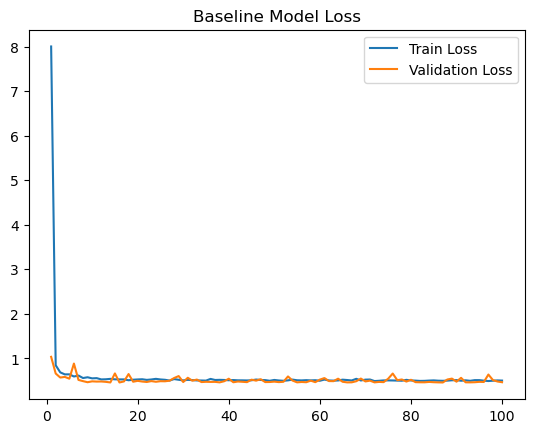

In [25]:
def plot_loss_curves(epochs, train_loss, valid_loss, title):
    plt.plot(epochs, train_loss, label="Train Loss")
    plt.plot(epochs, valid_loss, label="Validation Loss")
    plt.title(title)
    plt.legend()
    plt.show()

plot_loss_curves(np.linspace(1, epochs, epochs), train_loss, valid_loss, 'Baseline Model Loss')

# Making changes to basic MLP

* **Normalizing the data** alone decreases the MSE by 20%, making it the most significant factor in improving the model's performance and stabilizing the loss curve. As shown in the graph titled "Baseline Model," the loss curves are very stochastic. However, in the graph generated after normalization, the loss curves become very stable, and the lines are much smoother than before.
* **Adding more hidden layers**, **decreasing the learning rate**, and **increasing the momentum** for the SGD optimizer, **Changing the optimizer to Adam** sometimes improve the model's performance by a range of 0% to 5% relative to the MSE score achieved after data normalization, sometimes don't improve the model at all and sometimes even make the model worse

In total, normalizing the data improved the model by a lot, and other engineerings I did did not consistently make the model become significantly better, it sometimes makes it slightly better and sometimes doesn't, but overrall after all these changes I made to basic MLP, MSE improved by 20%

## Normalizing the data

In [26]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

train_x, ee_x, train_y, ee_y = train_test_split(X, Y, test_size=0.3, random_state=42)

valid_x, test_x, valid_y, test_y = train_test_split(ee_x, ee_y, test_size=0.5, random_state=42)

In [27]:
scaler = StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
valid_x = scaler.transform(valid_x)
test_x = scaler.transform(test_x)

train_x = pd.DataFrame(train_x, columns=df.columns[:-1])
valid_x = pd.DataFrame(valid_x, columns=df.columns[:-1])
test_x = pd.DataFrame(test_x, columns=df.columns[:-1])

In [28]:
print(train_x.shape)
print(valid_x.shape)
print(test_x.shape)

(1119, 11)
(240, 11)
(240, 11)


In [29]:
train_x = torch.tensor(train_x.to_numpy(), dtype=torch.float)
test_x = torch.tensor(test_x.to_numpy(), dtype=torch.float)
valid_x = torch.tensor(valid_x.to_numpy(), dtype=torch.float)

train_y = torch.tensor(train_y.to_numpy(), dtype=torch.float).view(-1, 1)
test_y = torch.tensor(test_y.to_numpy(), dtype=torch.float).view(-1, 1)
valid_y = torch.tensor(valid_y.to_numpy(), dtype=torch.float).view(-1, 1)

In [30]:
wine_train = WineDataset(train_x, train_y)
train_loader = DataLoader(dataset=wine_train, batch_size=8, shuffle=True)

wine_test = WineDataset(test_x, test_y)
test_loader = DataLoader(dataset=wine_test, batch_size=8)

MSE for 100: 0.3828808069229126


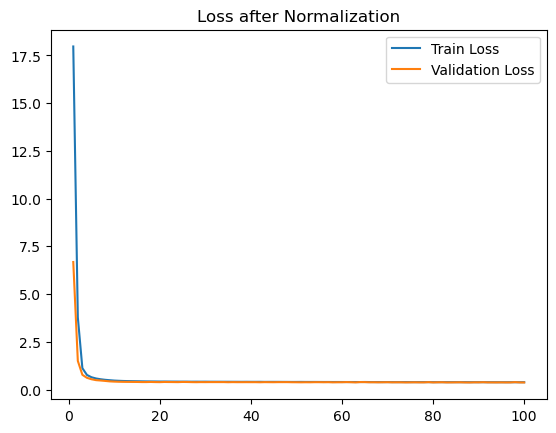

In [31]:
train_loss = []
valid_loss = []

model = get_basic_model()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.0001, momentum=0.95)

training_func(model, optimizer, epochs, train_loss, valid_loss)

hyp_test = model.forward(test_x)
test_loss = criterion(hyp_test, test_y)
print(f'MSE for {epochs}: {test_loss}')

plot_loss_curves(np.linspace(1, epochs, epochs), train_loss, valid_loss, 'Loss after Normalization')

## Add one more hidden layer and add more units to MLP model

In [32]:
class ImprovedMLP(torch.nn.Module):
    def __init__(self, n_inputs, n_hidden, n_outputs):
        super(ImprovedMLP, self).__init__()
        self.inputs = n_inputs
        self.hidden = n_hidden
        self.outputs = n_outputs
        
        self.linear1 = torch.nn.Linear(self.inputs, self.hidden)
        self.linear2 = torch.nn.Linear(self.hidden, self.hidden)
        self.linear3 = torch.nn.Linear(self.hidden, self.outputs)

        self.relu = torch.nn.ReLU()
        
    def forward(self, X):
        out = self.linear1(X)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.relu(out)
        out = self.linear3(out)
        return out

In [33]:
def get_improved_model():
    return ImprovedMLP(n_inputs=train_x.shape[1], n_hidden=10, n_outputs=1)

model = get_improved_model()
model

ImprovedMLP(
  (linear1): Linear(in_features=11, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [34]:
optimizer = get_sgd_optimizer(model, 0.0001, 0.95)

MSE for 1000: 0.4216074049472809


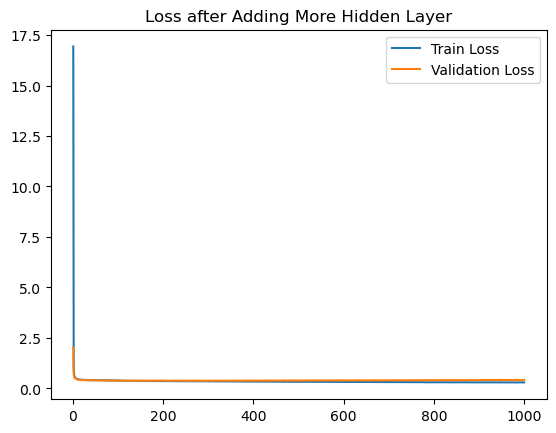

In [35]:
epochs = 1000

train_loss = []
valid_loss = []

training_func(model, optimizer, epochs, train_loss, valid_loss)

hyp_test = model.forward(test_x)
test_loss = criterion(hyp_test, test_y)
print(f'MSE for {epochs}: {test_loss}')

plot_loss_curves(np.linspace(1, epochs, epochs), train_loss, valid_loss, 'Loss after Adding More Hidden Layer')

## Increase Epoch and change learning rate

Learning rate: 1e-05, MSE: 0.3816621005535126


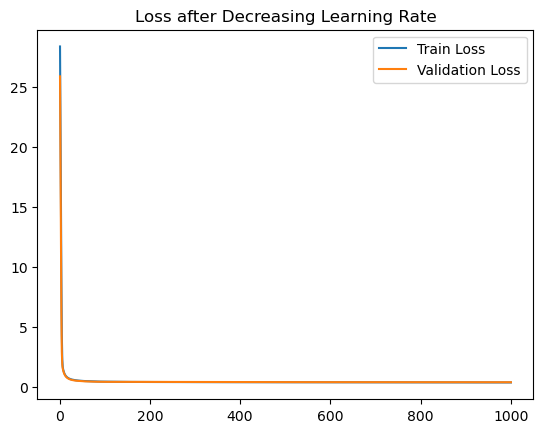

Learning rate: 1e-06, MSE: 0.43589332699775696


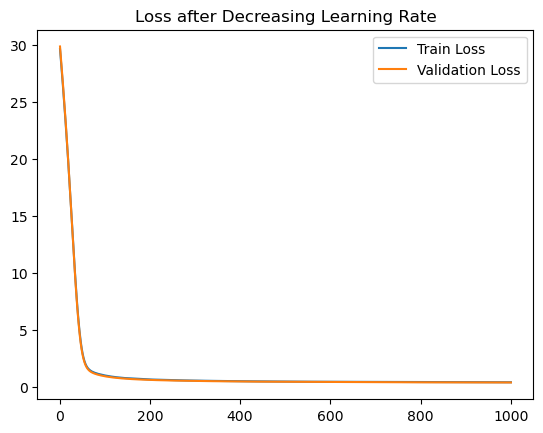

In [36]:
epochs = 1000

lrs = [0.00001, 0.000001]

train_loss = []
valid_loss = []

for lr in lrs:
    train_loss = []
    valid_loss = []

    model = get_improved_model()
    optimizer = get_sgd_optimizer(model, lr, 0.95)
    training_func(model, optimizer, epochs, train_loss, valid_loss)

    test_loss = get_mse(test_x, test_y)
    print(f'Learning rate: {lr}, MSE: {test_loss}')

    plot_loss_curves(np.linspace(1, epochs, epochs), train_loss, valid_loss, 'Loss after Decreasing Learning Rate')

## Change the momentum

Momentum: 0.9, MSE: 0.3977203071117401


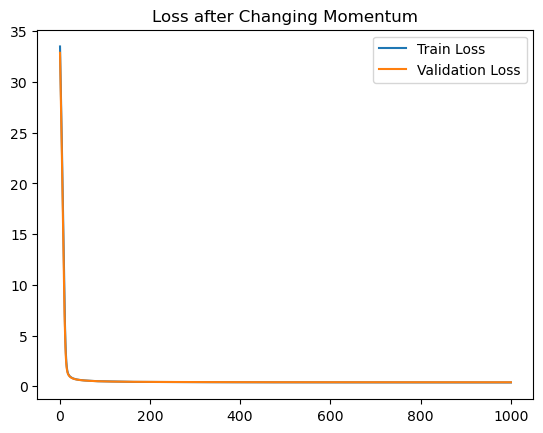

Momentum: 0.95, MSE: 0.39507973194122314


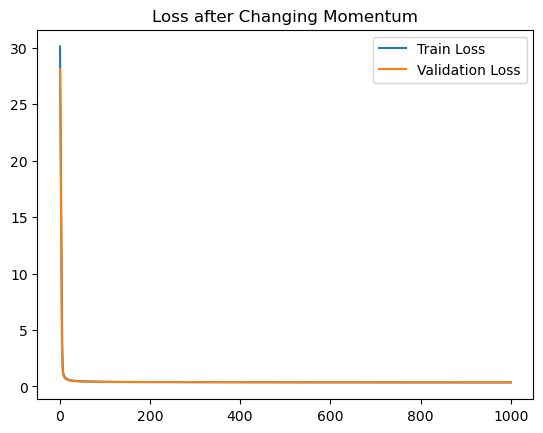

In [37]:
momentums = [0.9, 0.95]

epochs = 1000

for momentum in momentums:
    train_loss = []
    valid_loss = []

    model = get_improved_model()
    optimizer = get_sgd_optimizer(model, 0.00001, momentum)
    training_func(model, optimizer, epochs, train_loss, valid_loss)

    test_loss = get_mse(test_x, test_y)
    print(f'Momentum: {momentum}, MSE: {test_loss}')

    plot_loss_curves(np.linspace(1, epochs, epochs), train_loss, valid_loss, 'Loss after Changing Momentum')

## Change the optimizer

Momentum: 0.95, MSE: 0.39975520968437195


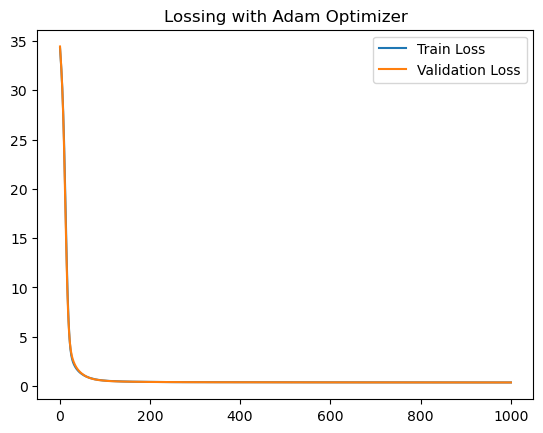

In [38]:
model = get_improved_model()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)

train_loss = []
valid_loss = []
training_func(model, optimizer, epochs, train_loss, valid_loss)

test_loss = get_mse(test_x, test_y)
print(f'Momentum: {momentum}, MSE: {test_loss}')

plot_loss_curves(np.linspace(1, epochs, epochs), train_loss, valid_loss, 'Lossing with Adam Optimizer')

# Optional: Implementing the MLP

In [39]:
# Add steps